In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv('creditcard.csv')

Incarcam fisierul CSV cu tranzactii bancare. Fiecare rand reprezinta o tranzactie, iar coloana Class este tinta: 0 = legit ; 1 = frauda

In [5]:
print('Dimensiunea datasetului:', data.shape)
print('\nPrimele 5 randuri din dataset:')
data.head(5)

Dimensiunea datasetului: (284807, 31)

Primele 5 randuri din dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Am verificat cate randuri si cate coloane avem (284.807 respectiv 31). Putem observa ca variabilele V1-V28 sunt rezultatul unei transformari PCA. **Timp** e timpul de la prima tranzactie, **Amount** e suma tranzactiei, iar **Class** este eticheta

In [6]:
print('Informatii despre dataset:')
data.info()

Informatii despre dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nu

Am verificat daca exista valori lipsa si ce tipuri de date are fiecare coloana. Din ce putem observa, nu exista coloane goale (toate au 284.807 valori) si sunt numerice **float64**, ceea ce e perfect pentru modelul pe care il vom antrena mai tarziu.

In [7]:
print('Statistici descriptive:')
data.describe()

Statistici descriptive:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Am obtinut o imagine numerica asupra distributiei fiecarei variabile. Remarcam ca majoritatea variabilelor PCA au media = 0 si deviatia standard = 1. **Amount** variaza puternic, deci va trebui scalat. De asemenea, **Class** are medie = 0.0017, ceea ce ne confirma ca setul nostru de date are un dezechilibru masiv. Pentru asta, vom verifica mai in amanunt variabila **Class**.

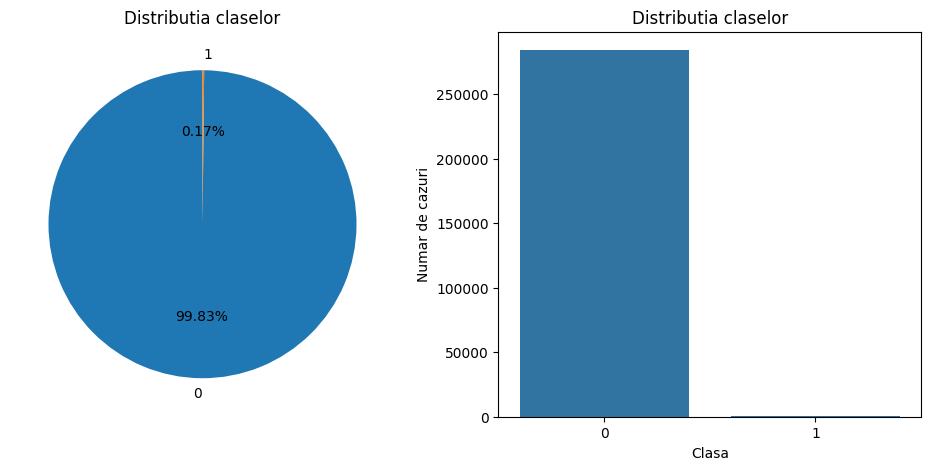

In [8]:
class_counts = data['Class'].value_counts()
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', startangle=90) 
plt.title('Distributia claselor')

plt.subplot(1,2,2)
sns.countplot(data=data, x='Class')
plt.title('Distributia claselor')
plt.xlabel('Clasa')
plt.ylabel('Numar de cazuri')

plt.show()

Dupa cum ne asteptam, putem vedea ca majoritatea tranzactiilor sunt legitime. Acesta este un lucru obisnuit pentru un astfel de set de date. 
- 99.8% tranzactii legitime
- 0.2% fraude (sub 500)

In [9]:
print('Numar de duplicate inainte:', data.duplicated().sum())

Numar de duplicate inainte: 1081


In [10]:
data = data.drop_duplicates()
data = data.drop(['Time'],axis=1)

In [11]:
print('Numarul de duplicate dupa:', data.duplicated().sum())
print('Primele 5 randuri din datesetul curatat')
data.head(5)

Numarul de duplicate dupa: 8063
Primele 5 randuri din datesetul curatat


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In acest pas am eliminat duplicatele, deoarece pot distorsiona invatarea si stergem complet coloana **Time**, deoarece nu aduce valoare semnificativa. 

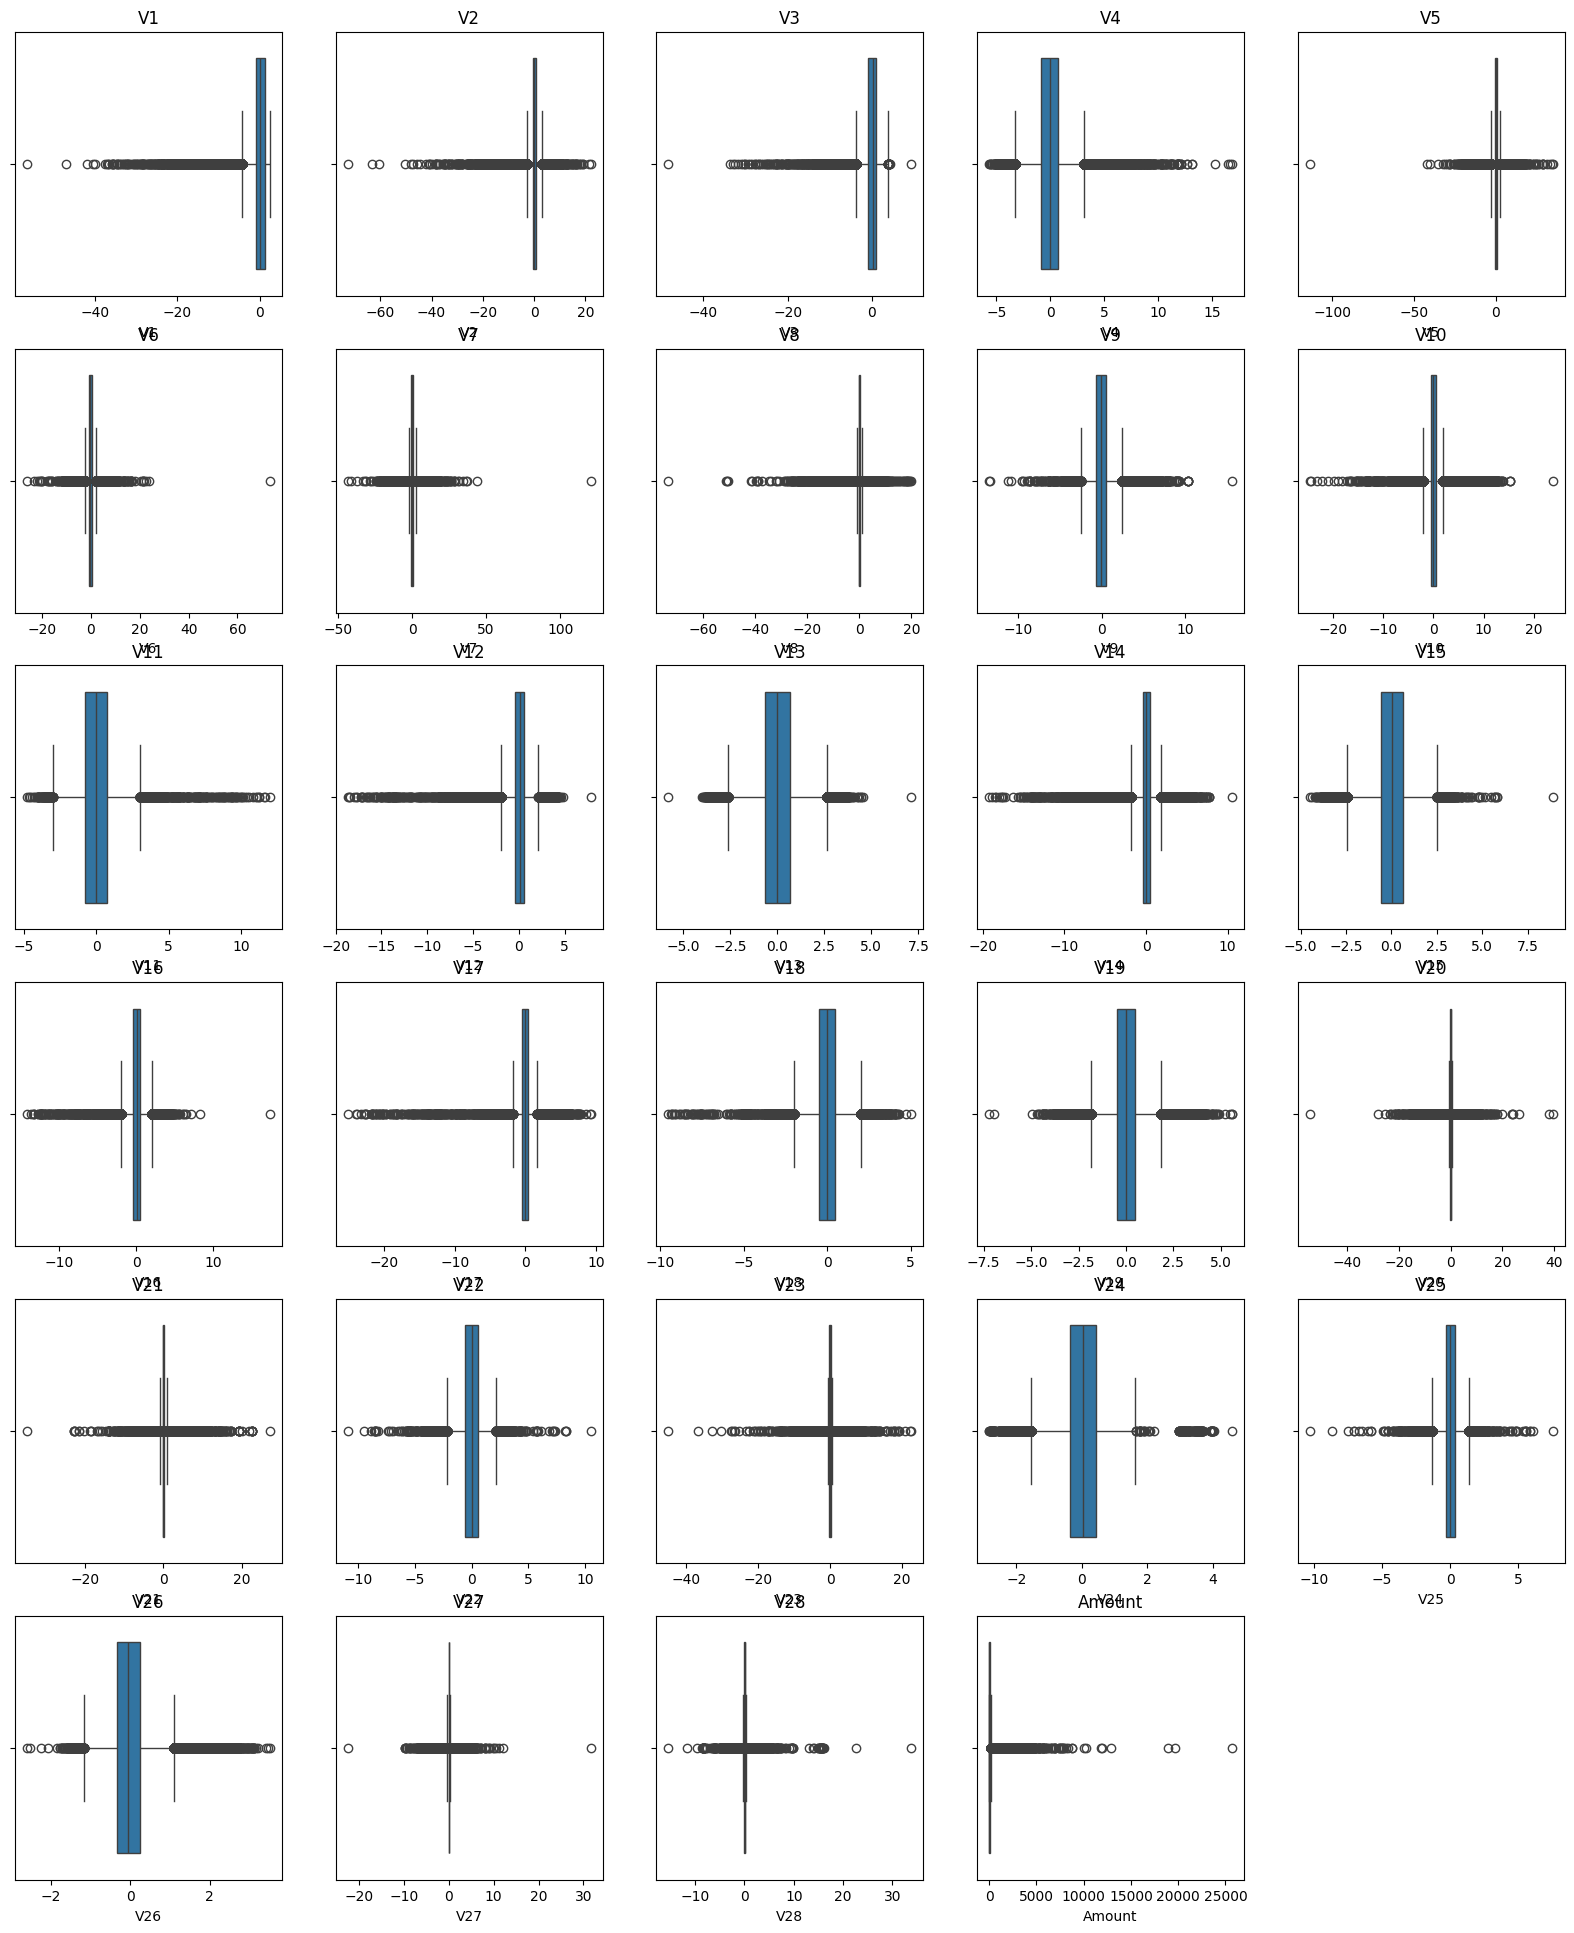

In [12]:
X = data.iloc[:, :-1]

plt.figure(figsize=(20,24))
for i, col in enumerate(X):
    plt.subplot(6,5,i+1)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout
plt.show()

Dorim sa vedem daca exista valori extreme pentru fiecare variabila. Pentru a intelege ce decizie vom lua, vom testa eliminarea valorilor extreme folosind metoda IQR in pasul de mai jos.

In [13]:
fraud_before = data[data['Class'] == 1].shape[0]

data1 = data.copy()

for col in data1.columns[:-1]:
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data1 = data1[(data1[col] >= lower_bound) & (data1[col] <= upper_bound)]

fraud_after = data1[data1['Class'] == 1].shape[0]

print("Numar de fraude inainte de eliminarea outlierilor:", fraud_before)
print("Numar de fraude dupa eliminarea outlierilor:", fraud_after)

Numar de fraude inainte de eliminarea outlierilor: 473
Numar de fraude dupa eliminarea outlierilor: 13


- Aplicarea metodei IQR pentru eliminarea valorilor extreme reduce drastic numarul de tranzactii frauduloase pastrate.
- In acest caz, din **473** inițiale, au ramas doar **13** dupa filtrare.

**Decizie**: Nu eliminam valorile extreme din acest dataset, deoarece am afecta negativ clasa minoritara (fraudele), care este oricum rara.

In [14]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)
print('Distributia claselor in setul de antrenare:')
print(y_train.value_counts(normalize=True))

print('\nDistributia claselor in setul de testare:')
print(y_test.value_counts(normalize=True))

Distributia claselor in setul de antrenare:
Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64

Distributia claselor in setul de testare:
Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


Am separat variabilele de intrare **X** de eticheta **y**. Imparirea datelor in seturi de antrenament (80%) si test (20%) s-a facut folosind **train_test_split**. De asemenea, am specificat si **stratify=y** pentru a ne asigura ca distributia claselor se pastreaza.

In [15]:
scaler = StandardScaler()
amount_train_scaled = scaler.fit_transform(X_train[['Amount']])
amount_test_scaled = scaler.transform(X_test[['Amount']])

X_train_scaled = X_train.copy()
X_train_scaled['Amount'] = amount_train_scaled

X_test_scaled = X_test.copy()
X_test_scaled['Amount'] = amount_test_scaled

print(X_train_scaled['Amount'].describe())
print(X_test_scaled['Amount'].describe())

count    2.269800e+05
mean     7.516138e-17
std      1.000002e+00
min     -3.514704e-01
25%     -3.293052e-01
50%     -2.642372e-01
75%     -4.341845e-02
max      1.015176e+02
Name: Amount, dtype: float64
count    56746.000000
mean        -0.003318
std          0.963815
min         -0.351470
25%         -0.328909
50%         -0.263999
75%         -0.046154
max         50.842205
Name: Amount, dtype: float64


Am aplicat standardizarea **StandardScaler** doar pe coloana **Amount**, deoarece este singura variabila care nu a fost transformata anterior prin PCA. 

In [37]:
X_legit = X_train_scaled[y_train == 0]
y_legit = y_train[y_train == 0]

X_fraud = X_train_scaled[y_train == 1]
y_fraud = y_train[y_train == 1]

X_legit_undersampled, y_legit_undersampled = resample(
    X_legit, y_legit,
    replace = False,
    n_samples = len(y_fraud),
    random_state = 43
)

X_train_undersampled = pd.concat([X_legit_undersampled, X_fraud])
y_train_undersampled = pd.concat([y_legit_undersampled, y_fraud])

print('Distributia claselor in setul de antrenare dupa undersample:')
print(y_train_undersampled.value_counts())


Distributia claselor in setul de antrenare dupa undersample:
Class
0    378
1    378
Name: count, dtype: int64


In aceasta etapa dorim sa echilibram setul de testare, deoarece clasa **0** este coplesitor de dominanta fata de clasa **1**. Alegem sa facem undersampling, adicasa reducem numarul de exemple din clasa 0 pentru a il egala pe cel din clasa 1.

**ATENTIE**: Prin undersampling pierdem foarte multa informatie, iar in acest caz modelul va generaliza greu pe datele din test (Rezultate proaste).

In [52]:
smote = SMOTE(random_state=42, sampling_strategy='minority')


X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


print("Distributia claselor in setul de antrenare dupa undersample:")
print(y_train_smote.value_counts())


Distributia claselor in setul de antrenare dupa undersample:
Class
0    226602
1    226602
Name: count, dtype: int64


Dupa ce anterior am aplicat undersampling, aici alegem strategia opusa: **oversampling** al clasei minoritare **1** cu ajutorul SMOTE. Cu ajutorul SMOTE, modelele obtinute pot avea comportament mai echilibrat.

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)

rf.fit(X_train_undersampled, y_train_undersampled)
y_pred_rf = rf.predict(X_test_scaled)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf, digits=4)

print("Random Forest (UNDERSAMPLING)")
print("Confusion Matrix:")
print(cm_rf)
print("\nClassification Report:")
print(cr_rf)


Random Forest (UNDERSAMPLING)
Confusion Matrix:
[[54311  2340]
 [    8    87]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9587    0.9788     56651
           1     0.0358    0.9158    0.0690        95

    accuracy                         0.9586     56746
   macro avg     0.5178    0.9372    0.5239     56746
weighted avg     0.9982    0.9586    0.9773     56746



Antrenam un model de tip **Random Forest** folosind detele de antrenament reduse. Random Forest este un algoritm bazat pe mai multi arbori de decizie. Acesta este rezistent la overfitting si are performanta buna pe date neliniare. 

Putem observa ca:
- TP = 87 : Identificare corecta 87 fraude
- TN = 54311 : Identificare corecta 54.311 tranzactii legit
- FP = 2340 : Identificare gresita a 2.340 legitime ca fiind frauda
- FN = 8 : Identificarea greista a 8 fraude ca tranzactii legitime

Am obtinut aceste rezultate slabe din cauza ca modelul nu a avut pe ce sa invete in cazul undersampling. 

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)

rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf, digits=4)

print("Random Forest (FARA UNDERSAMPLING/SMOTE)")
print("Confusion Matrix:")
print(cm_rf)
print("\nClassification Report:")
print(cr_rf)

=== Random Forest (FARA UNDERSAMPLING/SMOTE) ===
Confusion Matrix:
[[56649     2]
 [   23    72]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     56651
           1     0.9730    0.7579    0.8521        95

    accuracy                         0.9996     56746
   macro avg     0.9863    0.8789    0.9259     56746
weighted avg     0.9995    0.9996    0.9995     56746



In acest pas am antrenat modelul direct pe date reale, fara sa echilibram clasele si am evaluat performanta pe setul de test. 

Putem observa ca avem scoruri surprinzator de bune. Acest lucru se intampla din cauza ca clasa minoritara are un **pattern clar** (nu este zgomotoasa). 

In [ ]:
rf = RandomForestClassifier(n_estimators=10,random_state=42)

rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test_scaled)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf, digits=4)

print("Random Forest (SMOTE)")
print("Confusion Matrix:")
print(cm_rf)
print("\nClassification Report:")
print(cr_rf)

=== Random Forest (SMOTE) ===
Confusion Matrix:
[[56632    19]
 [   11    84]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9997    0.9997     56651
           1     0.8155    0.8842    0.8485        95

    accuracy                         0.9995     56746
   macro avg     0.9077    0.9419    0.9241     56746
weighted avg     0.9995    0.9995    0.9995     56746



In acest pas am antrenat modelul pe un set de date antrenate echilibrat cu **SMOTE**. Acesta a adus un echilibru in antrenare, ceea ce a permis modelului sa invete mai multe despre clasa minoritara.

Acest model este foarte potrivit pentru scenarii in care banca vrea sa minimizeze fraudele ratate, chiar daca apare un numar mic de alerte false (clienti nemultumiti).

Pentru o performanta imbunatatita putem face tunning-ul hiperparametrilor cu ajutorul GridSearchCV. Acesta testeaza cobinatii dintr-o grila de valori predefinite si o alege pe cea mai buna (in functie de scorul pe care dorim sa il optimizam)